<AxesSubplot:title={'center':'Cichago ZIP Codes'}>

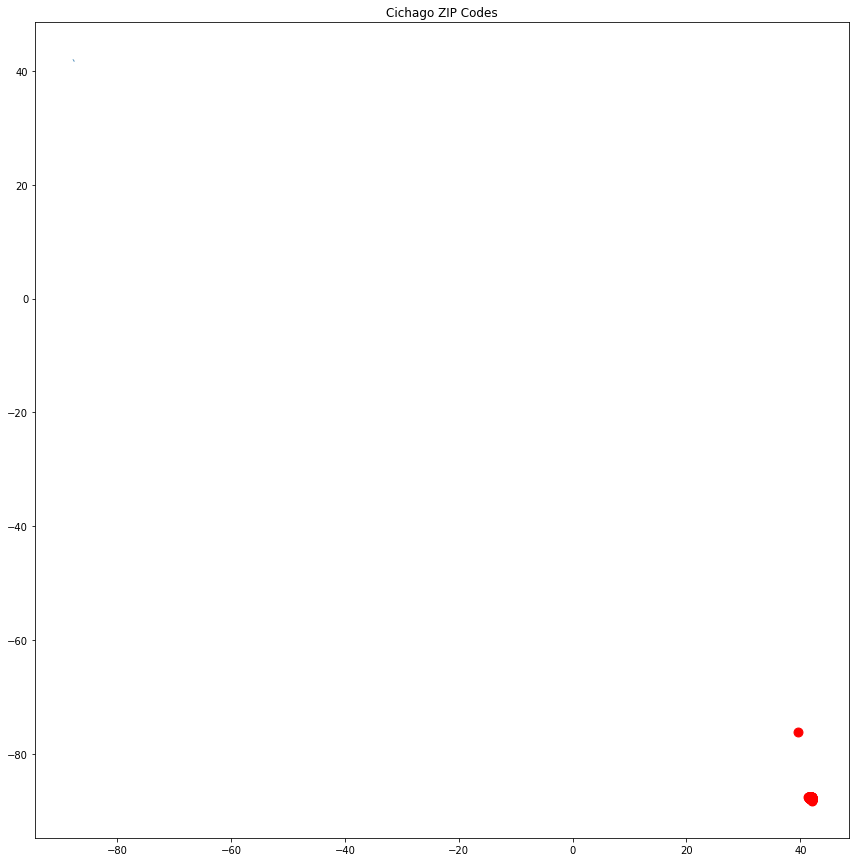

In [10]:
import food_banks
import geopandas
from geopy.geocoders import Nominatim
import pandas as pd
import matplotlib.pyplot as plt

chi_fb = food_banks.get_locations("https://www.chicagosfoodbank.org/find-food/")
fb_maps = geopandas.GeoDataFrame(chi_fb)
chicago_zipcode = geopandas.read_file('Boundaries - ZIP Codes')

#code to graph address
geolocator = Nominatim(user_agent="chifood")
lat = []
lon = []
for _, row in chi_fb.iterrows():
    loc = geolocator.geocode(row["address"])
    if loc != None:
        lat.append(loc.latitude)
        lon.append(loc.longitude)
    else:
        lat.append(pd.NaT)
        lon.append(pd.NaT)

chi_fb["Latitude"] = lat
chi_fb["Longitude"] = lon

chi_fb = chi_fb.dropna()

gdf_fb = geopandas.GeoDataFrame(
    chi_fb, geometry=geopandas.points_from_xy(chi_fb.Latitude, chi_fb.Longitude))
#gdf.plot(ax=ax, marker='o', color='red', markersize=80)

In [56]:
df_covid.rename({"zip_code":"zip"}, axis=1, inplace=True)

In [63]:
covid_chi = chicago_zipcode.merge(df_covid[["zip", "death_rate_cumulative"]], how="inner", on="zip")

<AxesSubplot:title={'center':'Cichago ZIP Codes'}>

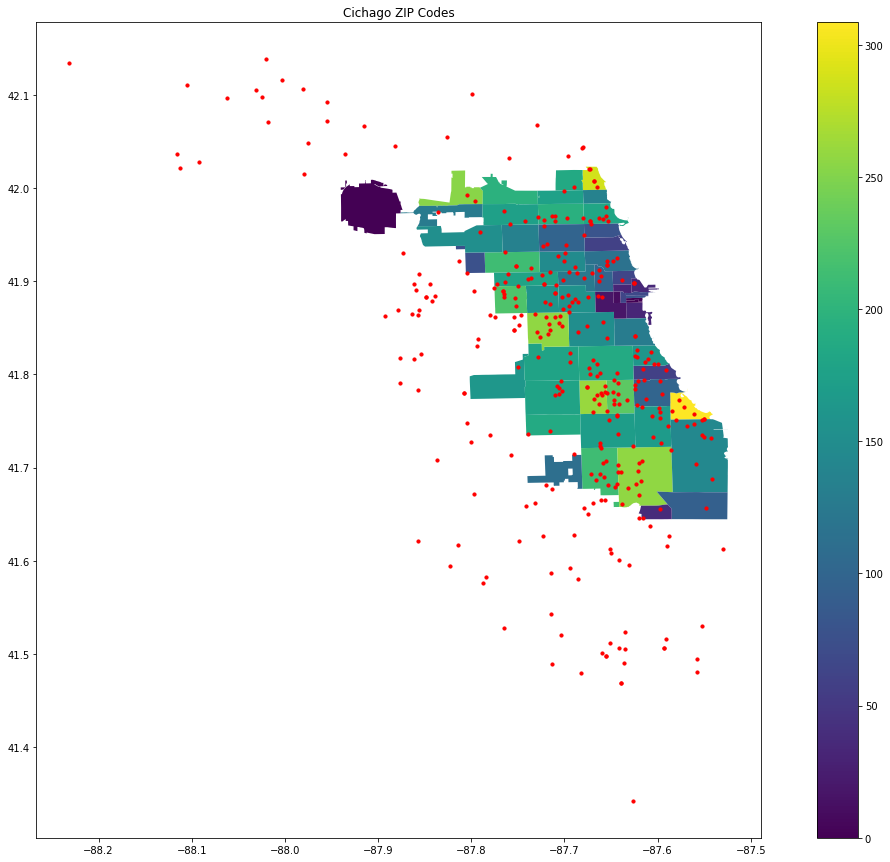

In [69]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_title('Cichago ZIP Codes')
covid_chi.plot(ax=ax, column="death_rate_cumulative", legend=True)
gdf_fb.plot(ax=ax, marker='o', color='red', markersize=10)

In [1]:
df_covid

NameError: name 'df_covid' is not defined

In [61]:
chicago_zipcode

,objectid,shape_area,shape_len,zip,geometry
0,33.0,1.060523e+08,42720.044406,60647,"POLYGON ((-87.67762 41.91776, -87.67761 41.917..."
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-87.72683 41.92265, -87.72693 41.922..."
2,35.0,4.506904e+07,27288.609612,60707,"POLYGON ((-87.78500 41.90915, -87.78531 41.909..."
3,36.0,7.085383e+07,42527.989679,60622,"POLYGON ((-87.66707 41.88885, -87.66707 41.888..."
4,37.0,9.903962e+07,47970.140153,60651,"POLYGON ((-87.70656 41.89555, -87.70672 41.895..."
...,...,...,...,...,...
56,57.0,1.552855e+08,53406.915617,60623,"POLYGON ((-87.69479 41.83008, -87.69486 41.830..."
57,58.0,2.111148e+08,58701.325375,60629,"POLYGON ((-87.68306 41.75786, -87.68306 41.757..."
58,59.0,2.116961e+08,58466.160298,60620,"POLYGON ((-87.62373 41.72167, -87.62388 41.721..."
59,60.0,1.254243e+08,52377.854541,60637,"POLYGON ((-87.57691 41.79511, -87.57700 41.795..."


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>